<a href="https://colab.research.google.com/github/zdanielshi/personal_projects/blob/main/RELY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Install yfinance

In [ ]:
pip install yfinance

Import libraries

In [5]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import requests

Define the start and end times. Start time is March 22, 2022, the end of the RELY lockup. End date is coded to today.

# Relative returns since RELY lockup end

In [3]:
start_date = '2022-03-22'
end_date = dt.date.today().strftime('%Y-%m-%d')

## Get returns for each comp

Define a function to get the return for each comp.

In [4]:
def get_stock(ticker):
  stock = yf.Ticker(ticker)
  stock_close = stock.history(interval='1d', start=start_date, end=end_date)['Close']
  stock_close = stock_close.tolist()

  live_price = stock.info['regularMarketPrice']
  stock_close.append(int(live_price))

  stock_returns = [] # initialize a returns list
  for i in stock_close: # iterate through the close list
    stock_returns.append((i / stock_close[0]) - 1)# calculate each value against the 0 index value, append to the returns list
  return stock_returns

Run the function for comps and indices.

In [5]:
rely_returns = get_stock('rely')
wise_returns = get_stock('wise.l')
pypl_returns = get_stock('pypl')
sq_returns = get_stock('sq')
coin_returns = get_stock('coin')
ml_returns = get_stock('ml')
dave_returns = get_stock('dave')
nu_returns = get_stock('nu')
flyw_returns = get_stock('flyw')
payo_returns = get_stock('payo')
tost_returns = get_stock('tost')
sofi_returns = get_stock('sofi')
dlo_returns = get_stock('dlo')
hood_returns = get_stock('hood')
upst_returns = get_stock('upst')
gdot_returns = get_stock('gdot')
wu_returns = get_stock('wu')
spy_returns = get_stock('spy')
nasdaq_100_returns = get_stock('^ndxt')

## Results

<function matplotlib.pyplot.show>

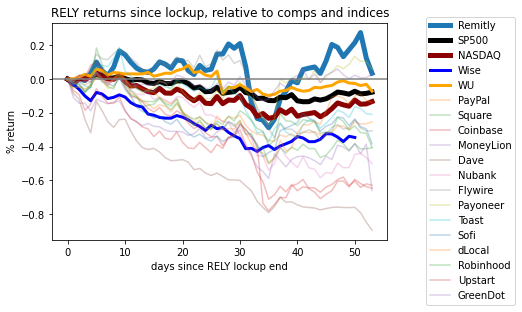

In [6]:
from pandas.core.indexes.datetimes import date_range
plt.plot(rely_returns, lw=5, label='Remitly')
plt.plot(spy_returns, lw=5, color='black', label='SP500')
plt.plot(nasdaq_100_returns, lw=5, color='darkred', label='NASDAQ')
plt.plot(wise_returns, label='Wise', color='blue', lw=3)
plt.plot(wu_returns, label='WU', color='orange', lw=3)
plt.plot(pypl_returns, label='PayPal', alpha=.3)
plt.plot(sq_returns, label='Square', alpha=.3)
plt.plot(coin_returns, label='Coinbase', alpha=.3)
plt.plot(ml_returns, label='MoneyLion', alpha=.3)
plt.plot(dave_returns, label='Dave', alpha=.3)
plt.plot(nu_returns, label='Nubank', alpha=.3)
plt.plot(flyw_returns, label='Flywire', alpha=.3)
plt.plot(payo_returns, label='Payoneer', alpha=.3)
plt.plot(tost_returns, label='Toast', alpha=.3)
plt.plot(sofi_returns, label='Sofi', alpha=.3)
plt.plot(dlo_returns, label='dLocal', alpha=.3)
plt.plot(hood_returns, label='Robinhood', alpha=.3)
plt.plot(upst_returns, label='Upstart', alpha=.3)
plt.plot(gdot_returns, label='GreenDot', alpha=.3)

plt.title('RELY returns since lockup, relative to comps and indices')
plt.ylabel("% return")
plt.xlabel("days since RELY lockup end")
plt.axhline(y=0, color = 'gray')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show

<function matplotlib.pyplot.show>

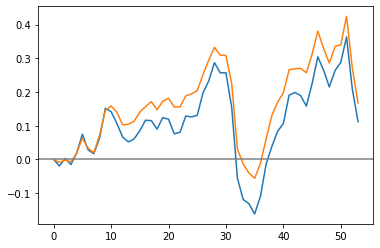

In [7]:
rely_spy_relative = []
for i in range(len(rely_returns)):
  rely_spy_relative.append(rely_returns[i] - spy_returns[i])

plt.plot(rely_spy_relative)
plt.show

rely_nasdaq100_relative = []
for i in range(len(rely_returns)):
  rely_nasdaq100_relative.append(rely_returns[i] - nasdaq_100_returns[i])

plt.plot(rely_nasdaq100_relative)
plt.axhline(y=0, color = 'gray')
plt.show

In [8]:
rely_price = yf.Ticker('rely')
stock_close = pd.DataFrame(rely_price.history(interval='1d', start=start_date, end=end_date)['Close'])
stock_close.insert(1, 'Return %', round((stock_close['Close'] / stock_close['Close'][0] - 1) * 100, 1))

print(str(len(stock_close)) + " trading days since lock up end")

53 trading days since lock up end


In [9]:
stock_close

,Close,Return %
Date,,
2022-03-22,9.66,0.0
2022-03-23,9.35,-3.2
2022-03-24,9.71,0.5
2022-03-25,9.58,-0.8
2022-03-28,9.98,3.3
2022-03-29,10.64,10.1
2022-03-30,10.13,4.9
2022-03-31,9.87,2.2
2022-04-01,10.35,7.1


# Revenue multiples analysis

In [6]:
response = requests.get('https://fmpcloud.io/api/v3/income-statement/RELY?period&limit=120&apikey=28675f2e36bc0b1b9d810cc9ec38f13a')

In [7]:
rely_obj = response.json()

In [9]:
rely_df = pd.DataFrame(rely_obj)
rely_df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2021-12-31,RELY,USD,0001782170,2022-03-29,2022-03-29 17:19:30,2021,FY,458605000,5.256000e+06,...,-0.082234,1043000.0,-38756000,-0.084508,-0.258347,-0.258347,150015556,150015556,https://www.sec.gov/Archives/edgar/data/178217...,https://www.sec.gov/Archives/edgar/data/178217...
1,2020-12-31,RELY,USD,0001782170,2020-12-31,2020-12-31,2020,FY,256956000,1.358420e+08,...,-0.122204,1163000.0,-32564000,-0.126730,-0.220000,-0.220000,150015556,150015556,,
2,2019-12-31,RELY,USD,0001782170,2019-12-31,2019-12-31,2019,FY,126567000,7.330300e+07,...,-0.403999,259000.0,-51392000,-0.406046,-0.417851,-0.417851,152030340,152030340,,
3,2017-12-31,RELY,USD,0001782170,2018-04-05,2018-04-05 16:11:23,2017,FY,1346400000,1.287300e+09,...,-0.095514,-7800000.0,-121700000,-0.090389,-4.201130,-4.201130,28968363,28968363,https://www.sec.gov/Archives/edgar/data/38984/...,https://www.sec.gov/Archives/edgar/data/38984/...
4,2016-12-31,RELY,USD,0001782170,2017-03-13,2017-03-13 17:25:56,2016,FY,1249700000,1.183000e+09,...,-0.083060,-600000.0,-102900000,-0.082340,-3.554977,-3.582982,28945331,28719098,https://www.sec.gov/Archives/edgar/data/38984/...,https://www.sec.gov/Archives/edgar/data/38984/...


KeyError: ignored